<a href="https://colab.research.google.com/github/Riyaloya27/NeuroNexus/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer


In [2]:
train_data = pd.read_csv('/content/fraudTrain.csv')
test_data = pd.read_csv('/content/fraudTest.csv')

In [3]:
combined_data = pd.concat([train_data, test_data], axis=0)

In [4]:
columns_to_drop = ['cc_num', 'trans_num', 'unix_time', 'street', 'first', 'last', 'dob','trans_date_trans_time']
combined_data.drop(columns_to_drop, axis=1, inplace=True)


In [5]:
label_encoder = LabelEncoder()
for column in ['merchant', 'category', 'gender', 'city', 'state', 'job']:
    combined_data[column] = label_encoder.fit_transform(combined_data[column])

In [6]:
train_data = combined_data[:len(train_data)]
test_data = combined_data[len(train_data):]

In [7]:
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

In [8]:
# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

In [9]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_imputed_scaled = scaler.fit_transform(X_train_imputed)

In [10]:
# Impute missing values in y_train
imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [11]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed_scaled, y_train_imputed)

RandomForestClassifier(random_state=42)

In [33]:
print(X_test.columns)

Index(['Unnamed: 0', 'merchant', 'category', 'amt', 'gender', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'merch_lat', 'merch_long'],
      dtype='object')


In [16]:
# Check if column names of X_train and X_test are the same
if all(X_train.columns == X_test.columns):
    print("X_train and X_test have the same features.")
else:
    print("X_train and X_test have different features.")

X_train and X_test have the same features.


In [17]:
print("Shape of X_test:", X_test.shape)

Shape of X_test: (11697, 14)


In [18]:
imputer_X_test = SimpleImputer(strategy='mean')
X_test_imputed = imputer_X_test.fit_transform(X_test)

In [19]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed_scaled, y_train_imputed)


RandomForestClassifier(random_state=42)

In [22]:
import numpy as np

In [23]:
# Remove rows with NaN values from y_test
X_test_imputed_cleaned = X_test_imputed[~np.isnan(y_test)]
y_test_cleaned = y_test[~np.isnan(y_test)]

In [24]:

# Predict on the cleaned test data
y_pred_cleaned = rf_model.predict(X_test_imputed_cleaned)

In [25]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test_cleaned, y_pred_cleaned))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11667
         1.0       0.00      0.00      0.00        29

    accuracy                           1.00     11696
   macro avg       0.50      0.50      0.50     11696
weighted avg       1.00      1.00      1.00     11696



In [27]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test_cleaned, y_pred_cleaned)
print("Accuracy:", accuracy)

Accuracy: 0.9974350205198358


In [28]:
# Assuming 'y_train' is your target variable in the training dataset
class_counts = y_train_imputed.value_counts()
print(class_counts)

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [29]:

# Convert y_train_imputed to a pandas Series
y_train_series = pd.Series(y_train_imputed)

# Get the class counts
class_counts = y_train_series.value_counts()
print(class_counts)

0.0    11658
1.0       48
dtype: int64


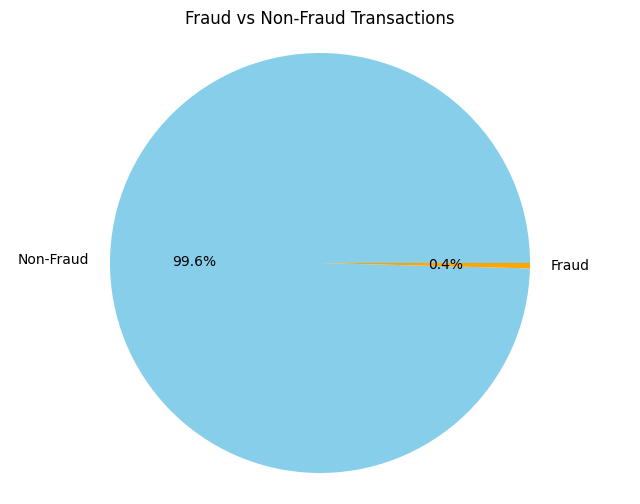

In [30]:
from matplotlib import pyplot as plt

# Get counts of fraud and non-fraud transactions in y_train
fraud_counts = (y_train_imputed == 1).sum()
non_fraud_counts = (y_train_imputed == 0).sum()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie([non_fraud_counts, fraud_counts], labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


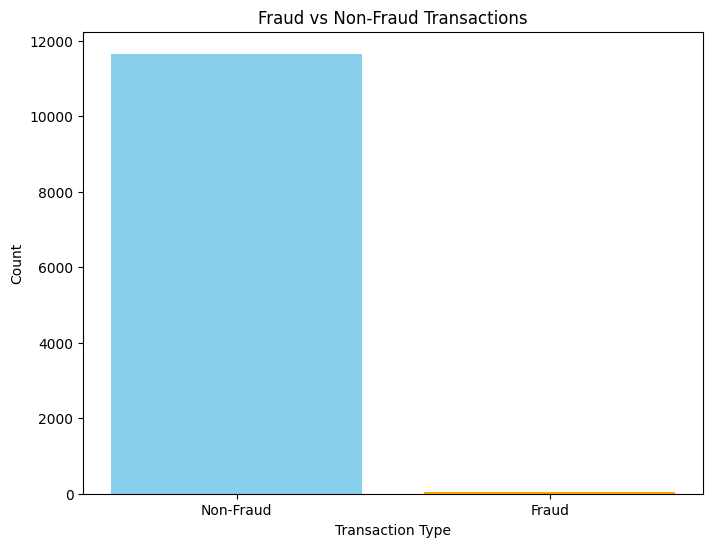

In [31]:
# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Non-Fraud', 'Fraud'], [non_fraud_counts, fraud_counts], color=['skyblue', 'orange'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

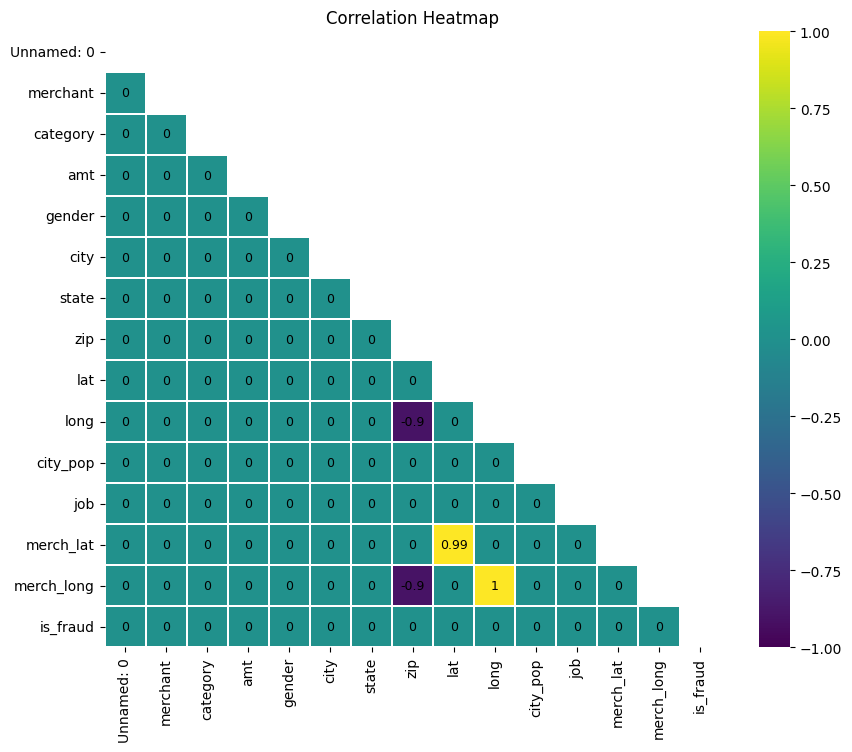

In [32]:
import seaborn as sns
import numpy as np
import pandas as pd

# Calculate the correlation matrix
corr_matrix = train_data.corr(method='pearson')

# Set the mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Replace values below threshold with 0
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Set the colormap
cmap = "viridis"

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 9, "color": "black"},
            square=True, cmap=cmap)
plt.title('Correlation Heatmap')
plt.show()


In [36]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression Classifier
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train_imputed_scaled, y_train_imputed)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_imputed_cleaned)

# Evaluate the model
print("Classification Report (Logistic Regression):")
print(classification_report(y_test_cleaned, y_pred_logistic))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93     11667
         1.0       0.00      0.00      0.00        29

    accuracy                           0.88     11696
   macro avg       0.50      0.44      0.47     11696
weighted avg       0.99      0.88      0.93     11696



In [37]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test_cleaned, y_pred_logistic)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8774794801641587


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Instantiate the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train_imputed_scaled, y_train_imputed)

# Make predictions
y_pred_tree = tree_model.predict(X_test_imputed_cleaned)

# Evaluate the model
print("Classification Report (Decision Tree):")
print(classification_report(y_test_cleaned, y_pred_tree))


Classification Report (Decision Tree):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11667
         1.0       0.00      0.00      0.00        29

    accuracy                           1.00     11696
   macro avg       0.50      0.50      0.50     11696
weighted avg       1.00      1.00      1.00     11696



In [39]:
# Calculate the accuracy
accuracy = accuracy_score(y_test_cleaned, y_pred_tree)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9974350205198358


In [40]:
# Define accuracy scores
accuracy_scores = {
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Score': [0.99, 0.87, 0.99]  # Replace with your actual accuracy scores
}

# Create DataFrame
accuracy_df = pd.DataFrame(accuracy_scores)

# Display DataFrame
print(accuracy_df)


                 Model  Accuracy Score
0        Random Forest            0.99
1  Logistic Regression            0.87
2        Decision Tree            0.99
